In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from utils.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'KNSL', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SAM', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TMUS', 'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO',
    'TWLO', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV',
    'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'APPS', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF',
    'CGAU', 'CTGO', 'DQ', 'DTST', 'EA',
    'EP', 'EPSN',  'ESOA', 'FCUV', 'FKWL', 'FNV', 'FSI', 'GCBC', 'GME',
    'GNRC', 'GTLS', 'HBM', 'HMY', 'IDR', 'INTZ', 'LPLA', 'MCVT',
    'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'POWW',
    'PRPH', 'RVP', 'RVYL', 'SAND', 'STKL', 'UI', 'VIRT', 'WAVD',
    'WKHS', 'WRN', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AREN', 'BB', 'CHUY', 'CSIQ', 'CUBI', 'DYAI', 'ICPT',
    'LFMD', 'LIXT', 'OPNT', 'PBF', 'PCRX', 'PFIE', 'RFP', 'SSNT',
    'TREE', 'VTSI', 'WFG']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)


In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-02-11', datetime.date(2023, 2, 11))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  159 of 159 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMZN... ANET... APPS... APT... AREN... ASML... AXON... BB... BROS... BRTX... BTTR... BYND... BYRN... CEF... CGAU... CHUY... CHWY... CRWD... CSIQ... CTGO... CUBI... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPSN... ESOA... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GH... GME... GMED... GNRC... GOOG... GTLS... HBM... HMY... ICPT... IDR... IDXX... INTG... INTZ... ISRG... JD... KNSL... LFMD... LIXT... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... OPNT... PAC... PACB... PANW... PAYC... PBF... PCRX... PFIE... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RFP... RGEN... RIVN... RMD... ROKU... RVL

In [5]:
data['Date'].tail()

2514   2023-02-06
2515   2023-02-07
2516   2023-02-08
2517   2023-02-09
2518   2023-02-10
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.001595
2       1.000592
3       1.000691
4       0.998955
5       1.007336
          ...   
2514    0.993860
2515    1.012873
2516    0.988919
2517    0.991170
2518    1.002195
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.012125
2,1.009666
3,1.004693
4,1.006279
5,1.009734
...,...
2514,1.000000
2515,1.025601
2516,0.997977
2517,1.000142


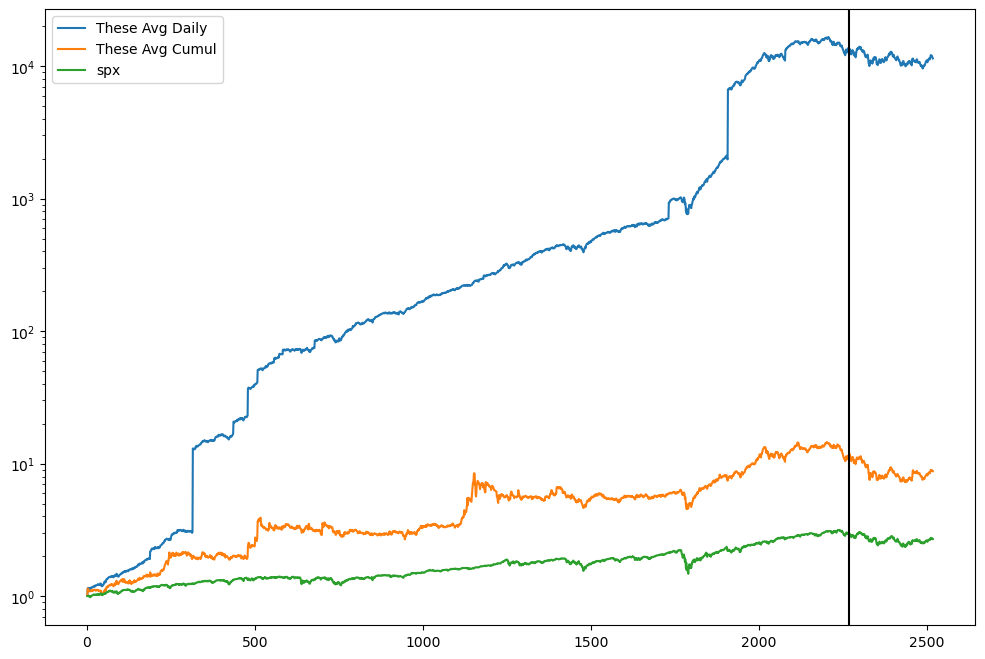

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-02-11,NaN,NaN
1,2013-02-12,1.012045,1.012045
2,2013-02-13,1.142461,1.140524
3,2013-02-14,1.152267,1.113493
4,2013-02-15,1.146523,1.110772


In [10]:
out.tail()

,Date,mine1,mine2
2514,2023-02-06,11762.149876,8.842813
2515,2023-02-07,11969.436934,8.957731
2516,2023-02-08,11764.916293,8.881881
2517,2023-02-09,11519.445912,8.775324
2518,2023-02-10,11429.592499,8.767502


In [11]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

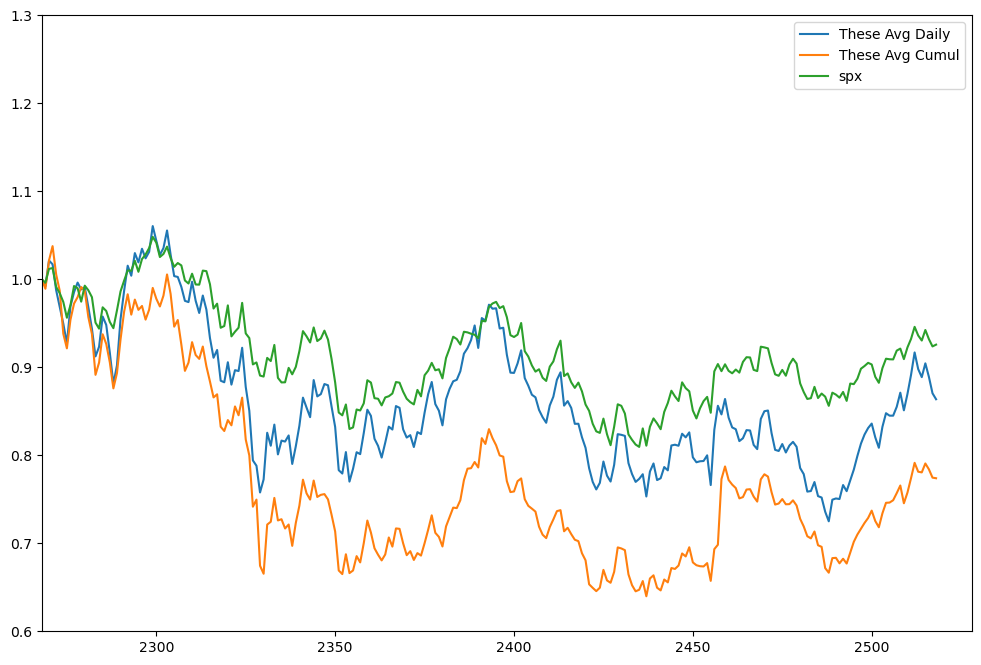

In [12]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.3)
plt.legend();

In [13]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [14]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [15]:
#rblx = get_stock_data('SE', data)
#rblx.head()

In [16]:
#rblx = rblx[['Value', 'Close', 'High', 'Low']]
#rblx.head()

In [17]:
#rblx['NextHigh'] = rblx.High.shift(-1)
#rblx['NextLow'] = rblx.Low.shift(-1)
#rblx['HighMult'] = rblx.NextHigh / rblx.Close
#rblx['LowMult'] = rblx.NextLow / rblx.Close
#rblx.head()

In [18]:
# For selling:
#high_05 = rblx.HighMult.quantile(q=[0.05])
#print(high_05)
#plt.hist(rblx.HighMult)
#plt.axvline(x=high_05[0.05], color='red');

In [19]:
# For buying:
#low_95 = rblx.LowMult.quantile(q=[0.95])
#print(low_95.tolist()[0])
#plt.hist(rblx.LowMult)
#plt.axvline(x=low_95[0.95], color='red');

In [20]:
#get_hilo_mult(rblx), get_hilo_mult(rblx, ci=0.5)

In [21]:
#aapl = get_stock_data('AAPL', data)
#get_hilo_mult(aapl), get_hilo_mult(aapl, ci=0.5)

In [22]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [23]:
#rblx['Trend'] = get_macd(rblx)
#rblx.head()

In [24]:
np.linspace(0.5, 0.95, 5)

array([0.5   , 0.6125, 0.725 , 0.8375, 0.95  ])

In [25]:
CIS = [0.3, 0.4, 0.5, 0.61, 0.73, 0.84, 0.95]

In [26]:
def get_hilo_mults(stock, cis=CIS):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    buy_pts_up = upward.LowMult.quantile(q=cis).tolist()
    sell_pts_up = (
        upward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    buy_pts_down = downward.LowMult.quantile(q=cis).tolist()
    sell_pts_down = (
        downward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    return buy_pts_up + sell_pts_up + buy_pts_down + sell_pts_down

In [27]:
#get_hilo_mults(aapl)

In [28]:
columns = [
    f'{bs}_pt_{ud}_p{int(100*p)}' 
    for ud in ['up', 'down']
    for bs in ['buy', 'sell'] 
    for p in CIS]
#columns

In [29]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock'] + columns)
df.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p73,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95
0,AAPL,0.981069,0.988191,0.990126,0.993130,0.994336,0.995072,1.000269,1.018389,1.015950,...,0.992965,0.998767,1.002544,1.018522,1.015258,1.008303,1.007329,1.004012,0.999587,0.992283
1,ABMD,0.998575,0.999152,0.999474,1.000000,1.000000,1.000000,1.000904,1.001679,1.001297,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,ABNB,0.976687,0.980308,0.986695,0.989044,0.993677,0.999869,1.009498,1.026880,1.024005,...,0.987867,0.998756,1.003107,1.020211,1.014646,1.009421,1.006732,1.001845,0.996440,0.985849
3,ACN,0.980892,0.985718,0.989161,0.993684,0.998488,0.999317,1.003304,1.016403,1.013957,...,0.994349,1.000512,1.009092,1.022850,1.014697,1.007749,1.002941,0.999128,0.994799,0.989098
4,ADBE,0.978427,0.982322,0.984341,0.988804,0.992711,0.999176,1.002362,1.020478,1.015526,...,0.995582,1.004132,1.017485,1.029777,1.023048,1.019972,1.008514,1.002491,0.999581,0.998113


In [30]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,151.009995,AAPL
ABMD,NaN,ABMD
ABNB,108.870003,ABNB
ACN,283.959991,ACN
ADBE,370.98999,ADBE
...,...,...
ZM,74.209999,ZM
ZYXI,12.59,ZYXI
^GSPC,4090.459961,^GSPC
^IXIC,11718.120117,^IXIC


In [31]:
prices = df.merge(price, how='left', on='stock')
prices.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
0,AAPL,0.981069,0.988191,0.990126,0.993130,0.994336,0.995072,1.000269,1.018389,1.015950,...,0.998767,1.002544,1.018522,1.015258,1.008303,1.007329,1.004012,0.999587,0.992283,151.009995
1,ABMD,0.998575,0.999152,0.999474,1.000000,1.000000,1.000000,1.000904,1.001679,1.001297,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2,ABNB,0.976687,0.980308,0.986695,0.989044,0.993677,0.999869,1.009498,1.026880,1.024005,...,0.998756,1.003107,1.020211,1.014646,1.009421,1.006732,1.001845,0.996440,0.985849,108.870003
3,ACN,0.980892,0.985718,0.989161,0.993684,0.998488,0.999317,1.003304,1.016403,1.013957,...,1.000512,1.009092,1.022850,1.014697,1.007749,1.002941,0.999128,0.994799,0.989098,283.959991
4,ADBE,0.978427,0.982322,0.984341,0.988804,0.992711,0.999176,1.002362,1.020478,1.015526,...,1.004132,1.017485,1.029777,1.023048,1.019972,1.008514,1.002491,0.999581,0.998113,370.98999


In [32]:
def round_if_float(x):
    if np.isnan(x):
        return -1
    return round(x, 2)

In [33]:
for col in list(prices):
    if col.startswith('buy') or col.startswith('sell'):
        prices[col] *= prices.price
    if col != 'stock':
        prices[col] = prices[col].apply(round_if_float)
prices.set_index('stock', inplace=True)
prices.drop(INDICES, inplace=True)
prices.tail()

,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,sell_pt_up_p50,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
stock,,,,,,,,,,,,,,,,,,,,,
XPEV,8.58,8.80,8.94,9.01,9.14,9.27,9.41,10.12,9.88,9.64,...,9.42,9.56,9.83,9.63,9.52,9.44,9.26,9.12,9.02,9.29
ZBRA,305.63,306.87,307.27,310.23,311.95,313.53,315.97,321.05,319.99,318.11,...,312.15,314.99,320.98,319.85,317.63,316.35,314.62,312.63,311.18,313.46
ZEST,0.28,0.28,0.28,0.29,0.29,0.30,0.30,0.34,0.33,0.33,...,0.30,0.30,0.34,0.33,0.32,0.32,0.31,0.30,0.29,0.30
ZM,71.63,72.19,72.85,73.03,73.20,73.69,74.93,76.91,75.77,75.44,...,73.51,74.34,75.72,75.29,75.12,74.99,74.33,73.97,72.62,74.21
ZYXI,12.25,12.32,12.38,12.44,12.47,12.52,12.58,12.91,12.88,12.85,...,12.55,12.61,13.02,12.98,12.89,12.84,12.76,12.69,12.62,12.59


In [34]:
prices.to_csv('mults.csv')
!open ./mults.csv